<a href="https://colab.research.google.com/github/plaban1981/LANGGRAPH/blob/main/Medical_document_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -qU langchain langgraph langchain_groq langchain_community mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00


## Setup API Key

In [5]:
from google.colab import userdata
import os
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')
os.environ['MISTRAL_API_KEY'] = userdata.get('MISTRAL_API_KEY')

In [6]:
!mkdir data

In [7]:
!wget "https://med.ucf.edu/media/2018/08/Sample-Adult-History-And-Physical-By-M2-Student.pdf" -O data/Sample.pdf

--2025-03-09 13:12:32--  https://med.ucf.edu/media/2018/08/Sample-Adult-History-And-Physical-By-M2-Student.pdf
Resolving med.ucf.edu (med.ucf.edu)... 23.185.0.4, 2620:12a:8000::4, 2620:12a:8001::4
Connecting to med.ucf.edu (med.ucf.edu)|23.185.0.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 712782 (696K) [application/pdf]
Saving to: ‘data/Sample.pdf’

data/Sample.pdf     100%[===================>] 696.08K  --.-KB/s    in 0.008s  

2025-03-09 13:12:32 (85.5 MB/s) - ‘data/Sample.pdf’ saved [712782/712782]



In [8]:
from mistralai import Mistral
client = Mistral(api_key=os.getenv("MISTRAL_API_KEY"))

In [9]:
client

In [ ]:
file_type = "PDF"  # @param ["PDF", "Image"]
source_type = "URL"  # @param ["URL", "Upload"]

## OCR with uploaded PDF

In [10]:
from mistralai import Mistral
import os
client = Mistral(api_key=os.getenv("MISTRAL_API_KEY"))

uploaded_pdf = client.files.upload(
    file={
        "file_name": "/content/data/Sample.pdf",
        "content": open("/content/data/Sample.pdf", "rb"),
    },
    purpose="ocr"
)

In [12]:
signed_url = client.files.get_signed_url(file_id=uploaded_pdf.id)

In [13]:
signed_url

FileSignedURL(url='https://mistralaifilesapiprodswe.blob.core.windows.net/fine-tune/6ac77cb9-23cb-4dff-b171-8e80dec109d2/5a5000dc4c384fbe9ef655e6908f1861.pdf?se=2025-03-10T13%3A32%3A16Z&sp=r&sv=2025-01-05&sr=b&sig=mLAgOZZhcqXGH/c6rxokLbWO%2Bg1ZXaT9qQpATgOWpUM%3D')

In [14]:
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": signed_url.url,
    }
)

In [20]:
text = "\n\n".join([page.markdown for page in ocr_response.pages])

In [21]:
print(text)

# Comprehensive Adult History and Physical 

(Sample Summative H\&P by M2 Student)


#### Abstract

This sample summative H\&P was written by a second-year medical student from UCF COM Class of 2020 at the end of COP-2. While not perfect, it best exemplifies the documentation skills students are expected and able to acquire by the end of P-2: organization, thoroughness, relevance, chronology, integrated topic review, documentation of references, etc.


For additional H\&P samples go to P-2 Webcourses home page and click on the COP/Portfolio Resources page.

Chief Complaint: "I got lightheadedness and felt too weak to walk"
Source and Setting: Patient reported in an in-patient setting on Day 2 of his hospitalization.
History of Present Illness: Patient is a 48 year-old well-nourished Hispanic male with a 2-month history of Rheumatoid Arthritis and strong family history of autoimmune diseases presenting after an episode of lightheadedness and muscle weakness.

Patient began experiencing 

In [28]:
def extracttpdf(pdf_name):
  uploaded_pdf = client.files.upload(
    file={
        "file_name": "pdf_name",
        "content": open("/content/data/Sample.pdf", "rb"),
    },
    purpose="ocr"
  )
  #
  signed_url = client.files.get_signed_url(file_id=uploaded_pdf.id)
  #
  ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": signed_url.url,
    }
  )
  #
  text = "\n\n".join([page.markdown for page in ocr_response.pages])
  return text

In [22]:
from typing import Dict, Any
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import StateGraph,START,END
from langchain_groq import ChatGroq
from pathlib import Path
import base64
from io import BytesIO

In [23]:
# Initialize clients
summary_llm = ChatGroq(
    model_name="mixtral-8x7b-32768",
    temperature=0
)
analyzer_llm = ChatGroq(
    model_name="DeepSeek-R1-Distill-Llama-70B",
    temperature=0.6
)

In [26]:
analyzer_llm.invoke("Hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 6, 'total_tokens': 22, 'completion_time': 0.058181818, 'prompt_time': 0.003500473, 'queue_time': 0.215743778, 'total_time': 0.061682291}, 'model_name': 'DeepSeek-R1-Distill-Llama-70B', 'system_fingerprint': 'fp_a8fa2b3c36', 'finish_reason': 'stop', 'logprobs': None}, id='run-903fba4f-cdae-4cf7-a080-edec3f370e77-0', usage_metadata={'input_tokens': 6, 'output_tokens': 16, 'total_tokens': 22})

In [44]:
from typing_extensions import TypedDict
class MedicalAnalysisState(TypedDict):
    file_name : str
    context:str
    analysis_result: str
    summary: str
    validation_result: str

In [100]:
def create_medical_analysis_chain():
    # Define the nodes (agents) in our graph
    def extract_context(state:MedicalAnalysisState):
        print("----------------------------------------------------")
        print("-----------Extracting context from PDF--------------")
        print("----------------------------------------------------")
        pdf_name  = state['file_name']
        text = extracttpdf(pdf_name)
        state["context"] = text
        return state
    def analyze_document(state:MedicalAnalysisState):
        print("----------------------------------------------------")
        print("------------Analyzing context from PDF--------------")
        print("----------------------------------------------------")
        messages = state["context"]
        document_content = messages

        # Use Langchain groq for medical analysis
        messages = [
            SystemMessage(content="""You are a medical document analyzer. Extract key information and format it in markdown with the following sections:

### Date of Incident
- Specify the date when the medical incident occurred

### Medical Facility
- Name of the medical center/hospital
- Location details

### Healthcare Providers
- Primary physician
- Other medical staff involved

### Patient Information
- Chief complaints
- Vital signs
- Relevant medical history

### Medications
- Current medications
- New prescriptions
- Dosage information

Please ensure the response is well-formatted in markdown with appropriate headers and bullet points."""),
            HumanMessage(content=document_content)
        ]
        response = analyzer_llm.invoke(messages)

        state["analysis_result"] = response.content.split("</think>")[-1]
        return state

    def generate_summary(state:MedicalAnalysisState):
        print("----------------------------------------------------")
        print("------------Generating summary from PDF-------------")
        print("----------------------------------------------------")
        analysis_result = state["analysis_result"]

        messages = [
            SystemMessage(content="""You are a medical report summarizer. Create a detailed summary in markdown format with the following sections:

### Key Findings
- Main medical issues identified
- Critical observations

### Diagnosis
- Primary diagnosis
- Secondary conditions (if any)

### Treatment Plan
- Recommended procedures
- Medications prescribed
- Follow-up instructions

### Additional Notes
- Important considerations
- Special instructions

Please ensure proper markdown formatting with headers, bullet points, and emphasis where appropriate."""),
            HumanMessage(content=f"Generate a detailed medical summary report based on this analysis: {analysis_result}")
        ]
        response = summary_llm.invoke(messages)

        state["summary"] = response.content
        return state

    def validate_diagnosis(state:MedicalAnalysisState):
        print("----------------------------------------------------")
        print("------------Validating diagnosis from PDF-----------")
        print("----------------------------------------------------")
        analysis_result = state["analysis_result"]
        summary = state["summary"]

        messages = [
            SystemMessage(content="""You are a medical diagnosis validator. Provide your assessment in markdown format with these sections:

### Alignment Analysis
- Evaluate if diagnosis matches symptoms
- Assess treatment appropriateness
- Review medication selections

### Recommendations
- Alternative treatments to consider
- Suggested medication adjustments
- Additional tests if needed

### Risk Assessment
- Potential complications
- Drug interaction concerns
- Follow-up recommendations

Please format your response in clear markdown with appropriate headers and bullet points."""),
            HumanMessage(content=f"""Analysis: {analysis_result}\nSummary: {summary}
                         Based on the Analysis and Summary provided please provide whether diagnosis,treatment and medication provided is in alignment with medical complaint.
                         If not in alignment then specify what best treatment and medication could have been provided.
                         """)
        ]
        response = analyzer_llm.invoke(messages)

        state["validation_result"] = response.content.split("</think>")[-1]
        return state

    # Create the graph
    workflow = StateGraph(MedicalAnalysisState)

    # Add nodes
    workflow.add_node("extractor", extract_context)
    workflow.add_node("analyzer", analyze_document)
    workflow.add_node("summarizer", generate_summary)
    workflow.add_node("validator", validate_diagnosis)

    # Define edges
    workflow.add_edge(START, "extractor")
    workflow.add_edge("extractor", "analyzer")
    workflow.add_edge("analyzer", "summarizer")
    workflow.add_edge("summarizer", "validator")
    workflow.add_edge("validator", END)


    # Compile the graph
    chain = workflow.compile()

    return chain

In [103]:
chain = create_medical_analysis_chain()

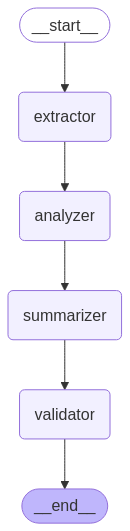

In [102]:
from IPython.display  import Image,display
display(Image(chain.get_graph().draw_mermaid_png()))

In [104]:
result = chain.invoke({"file_name": "/content/data/Sample.pdf"})

----------------------------------------------------
-----------Extracting context from PDF--------------
----------------------------------------------------
----------------------------------------------------
------------Analyzing context from PDF--------------
----------------------------------------------------
----------------------------------------------------
------------Generating summary from PDF-------------
----------------------------------------------------
----------------------------------------------------
------------Validating diagnosis from PDF-----------
----------------------------------------------------


In [105]:
result.keys()

dict_keys(['file_name', 'context', 'analysis_result', 'summary', 'validation_result'])

In [106]:
print(result["analysis_result"])



### Date of Incident
- November 2017

### Medical Facility
- **Name:** Not explicitly mentioned
- **Location:** In-patient setting

### Healthcare Providers
- **Primary Physician:** Second-year medical student from UCF COM Class of 2020
- **Other Medical Staff Involved:** Not specified

### Patient Information
- **Chief Complaints:** Lightheadedness and weakness
- **Vital Signs:** 
  - Temperature: 98.5°F
  - Heart Rate: 68 bpm
  - Blood Pressure: 126/85 mmHg
  - Respiratory Rate: 16 breaths per minute
- **Relevant Medical History:** 
  - Rheumatoid Arthritis diagnosed in January 2018
  - Strong family history of autoimmune diseases
  - Symptoms include joint pain, headaches, lightheadedness, nausea, and vomiting

### Medications
- **Current Medications:** 
  - Ibuprofen PRN for headaches and joint pain
- **New Prescriptions:** None mentioned
- **Dosage Information:** Not specified


In [107]:
print(result["summary"])

# Medical Report Summary

## Key Findings

* **Main medical issues identified:**
  - Lightheadedness and weakness
  - Joint pain
  - Headaches
  - Nausea
  - Vomiting
* **Critical observations:**
  - No critical observations were noted in the analysis.

## Diagnosis

* **Primary diagnosis:**
  - The primary diagnosis is not explicitly mentioned in the analysis.
* **Secondary conditions (if any):**
  - Rheumatoid Arthritis, diagnosed in January 2018
  - Strong family history of autoimmune diseases

## Treatment Plan

* **Recommended procedures:**
  - No specific procedures were mentioned in the analysis.
* **Medications prescribed:**
  - No new medications were prescribed during this visit.
  - Ibuprofen PRN for headaches and joint pain (continuing from previous treatment)
* **Follow-up instructions:**
  - Regular follow-ups with the primary physician or a rheumatologist are recommended.

## Additional Notes

* **Important considerations:**
  - The patient's symptoms and medical history

In [108]:
print(result["validation_result"])



### Alignment Analysis

- **Diagnosis Matching Symptoms**: The primary diagnosis is not explicitly mentioned, which is a significant concern. The patient's symptoms (lightheadedness, weakness, joint pain, headaches, nausea, and vomiting) and medical history (Rheumatoid Arthritis diagnosed in January 2018 and a strong family history of autoimmune diseases) suggest a possible autoimmune component. However, the absence of a clear primary diagnosis makes it challenging to assess alignment fully.

- **Treatment Appropriateness**: The treatment plan is insufficient. The patient is only continuing with Ibuprofen PRN for headaches and joint pain, which may help manage symptoms but does not address the underlying autoimmune condition. Rheumatoid Arthritis typically requires more targeted therapy, such as Disease-Modifying Antirheumatic Drugs (DMARDs), to prevent disease progression.

- **Medication Selections**: The use of Ibuprofen PRN is appropriate for short-term management of pain and inf